In [2]:
# !pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 161.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 159.3 MB/s eta 0:00:00


In [1]:
import pandas as pd

In [ ]:
#load csv
true_df = pd.read_csv("../data/True.csv")

#add label
true_df["label"] = 0
true_df

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


In [ ]:
#load csv
fake_df = pd.read_csv("../data/Fake.csv")

#add label
fake_df["label"] = 1
fake_df

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1


In [4]:
# Concatenate datasets
news_df = pd.concat([fake_df, true_df], ignore_index=True)

#drop date column
news_df.drop(columns=["date"], inplace=True)

news_df

,title,text,subject,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,1
...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,0
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,0
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,0
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,0


In [ ]:
# clean data
import re

def clean_text(text):
    text = text.lower()  # lowercase everything
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"\d+", "", text)  # remove numbers
    text = re.sub(r"[^\w\s]", "", text)  # remove punctuation
    text = re.sub(r"\s+", " ", text).strip()  # remove extra whitespace
    # # uncomment next line for variant 1
    # text = text.replace("reuters", "")  # Remove the word "reuters"
    return text

news_df['clean_text'] = news_df['title'] + " " + news_df['text']
news_df['clean_text'] = news_df['clean_text'].apply(clean_text)
news_df

,title,text,subject,label,clean_text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,1,donald trump sends out embarrassing new years ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,1,drunk bragging trump staffer started russian c...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,1,sheriff david clarke becomes an internet joke ...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,1,trump is so obsessed he even has obamas name c...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,1,pope francis just called out donald trump duri...
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,0,fully committed nato backs new us approach on ...
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,0,lexisnexis withdrew two products from chinese ...
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,0,minsk cultural hub becomes haven from authorit...
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,0,vatican upbeat on possibility of pope francis ...


In [6]:
#drop text column
news_df.drop(columns=["text"], inplace=True)

news_df

,title,subject,label,clean_text
0,Donald Trump Sends Out Embarrassing New Year’...,News,1,donald trump sends out embarrassing new years ...
1,Drunk Bragging Trump Staffer Started Russian ...,News,1,drunk bragging trump staffer started russian c...
2,Sheriff David Clarke Becomes An Internet Joke...,News,1,sheriff david clarke becomes an internet joke ...
3,Trump Is So Obsessed He Even Has Obama’s Name...,News,1,trump is so obsessed he even has obamas name c...
4,Pope Francis Just Called Out Donald Trump Dur...,News,1,pope francis just called out donald trump duri...
...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,worldnews,0,fully committed nato backs new us approach on ...
44894,LexisNexis withdrew two products from Chinese ...,worldnews,0,lexisnexis withdrew two products from chinese ...
44895,Minsk cultural hub becomes haven from authorities,worldnews,0,minsk cultural hub becomes haven from authorit...
44896,Vatican upbeat on possibility of Pope Francis ...,worldnews,0,vatican upbeat on possibility of pope francis ...


In [7]:
# Shuffle dataset
news_df = news_df.sample(frac=1, random_state=42).reset_index(drop=True)

news_df

,title,subject,label,clean_text
0,Ben Stein Calls Out 9th Circuit Court: Committ...,US_News,1,ben stein calls out th circuit court committed...
1,Trump drops Steve Bannon from National Securit...,politicsNews,0,trump drops steve bannon from national securit...
2,Puerto Rico expects U.S. to lift Jones Act shi...,politicsNews,0,puerto rico expects us to lift jones act shipp...
3,OOPS: Trump Just Accidentally Confirmed He Le...,News,1,oops trump just accidentally confirmed he leak...
4,Donald Trump heads for Scotland to reopen a go...,politicsNews,0,donald trump heads for scotland to reopen a go...
...,...,...,...,...
44893,UNREAL! CBS’S TED KOPPEL Tells Sean Hannity He...,politics,1,unreal cbss ted koppel tells sean hannity hes ...
44894,PM May seeks to ease Japan's Brexit fears duri...,worldnews,0,pm may seeks to ease japans brexit fears durin...
44895,Merkel: Difficult German coalition talks can r...,worldnews,0,merkel difficult german coalition talks can re...
44896,Trump Stole An Idea From North Korean Propaga...,News,1,trump stole an idea from north korean propagan...


In [8]:
news_df.describe()

,label
count,44898.000000
mean,0.522985
std,0.499477
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


SPLIT DATA

In [9]:
# !pip install scikit-learn

In [9]:
from sklearn.model_selection import train_test_split

# Split the dataset (assuming "claim" is the text and "label" is the target)
train_df, test_df = train_test_split(news_df, test_size=0.2, random_state=42)

print(f"Train size: {len(train_df)}, Test size: {len(test_df)}")


Train size: 35918, Test size: 8980


Tokenize data

In [10]:
# !pip install transformers
# !pip install ipywidgets

In [11]:
from transformers import RobertaTokenizer

# Load RoBERTa tokenizer
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

def tokenize_function(examples):
    return tokenizer(examples, truncation=True, padding="max_length", max_length=512)

# Tokenize train and test sets
train_encodings = tokenizer(list(train_df["clean_text"]), truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(list(test_df["clean_text"]), truncation=True, padding=True, max_length=512)


Convert Labels to Numeric Format

Prepare Dataset for PyTorch

In [13]:
# !pip install torch

In [12]:
import torch

class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

train_dataset = NewsDataset(train_encodings, list(train_df["label"]))
test_dataset = NewsDataset(test_encodings, list(test_df["label"]))


Load RoBERTa Model

In [13]:
from transformers import RobertaForSequenceClassification

model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=2)


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [14]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import numpy as np

# Define compute_metrics function
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    accuracy = accuracy_score(labels, predictions)
    precision = precision_score(labels, predictions, average="weighted")
    recall = recall_score(labels, predictions, average="weighted")
    f1 = f1_score(labels, predictions, average="weighted")

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
    }


In [15]:
# !pip install transformers[torch]
# !pip install accelerate>=0.26.0

Set Up Training Arguments

In [16]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=3e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

/common/home/projectgrps/IS424/IS424G4/jupyterlab-venv-pytorch-240/lib/python3.11/site-packages/transformers/training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Train the Model

In [17]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.000100,0.003184,0.999555,0.999555,0.999555,0.999555
2,0.000000,0.004809,0.999443,0.999444,0.999443,0.999443
3,0.000000,0.001990,0.999777,0.999777,0.999777,0.999777


TrainOutput(global_step=6735, training_loss=0.009316486924049325, metrics={'train_runtime': 2494.7817, 'train_samples_per_second': 43.192, 'train_steps_per_second': 2.7, 'total_flos': 2.835126865926144e+16, 'train_loss': 0.009316486924049325, 'epoch': 3.0})

In [18]:
# SUPPORTS = 0, REFUTES = 1
from sklearn.metrics import classification_report

# Get predictions from the trained model
predictions = trainer.predict(test_dataset)

# Extract logits and true labels
logits, labels = predictions.predictions, predictions.label_ids

# Convert logits to class predictions
y_pred = np.argmax(logits, axis=-1)
y_true = labels  # Actual labels from test dataset

# Print classification report
report = classification_report(y_true, y_pred, digits=5)
print(report)


              precision    recall  f1-score   support

           0    1.00000   0.99953   0.99977      4270
           1    0.99958   1.00000   0.99979      4710

    accuracy                        0.99978      8980
   macro avg    0.99979   0.99977   0.99978      8980
weighted avg    0.99978   0.99978   0.99978      8980



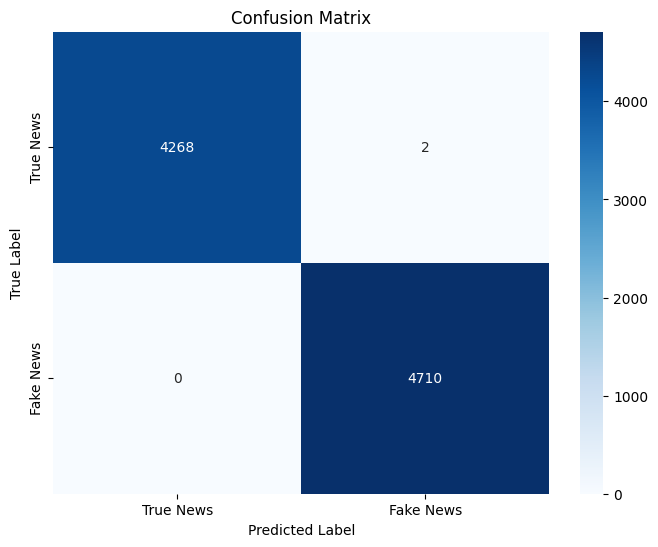

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions
predictions = trainer.predict(test_dataset)
preds = np.argmax(predictions.predictions, axis=-1)  # Get the predicted class indices
labels = predictions.label_ids

# Compute confusion matrix
cm = confusion_matrix(labels, preds)

# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["True News", "Fake News"], yticklabels=["True News", "Fake News"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

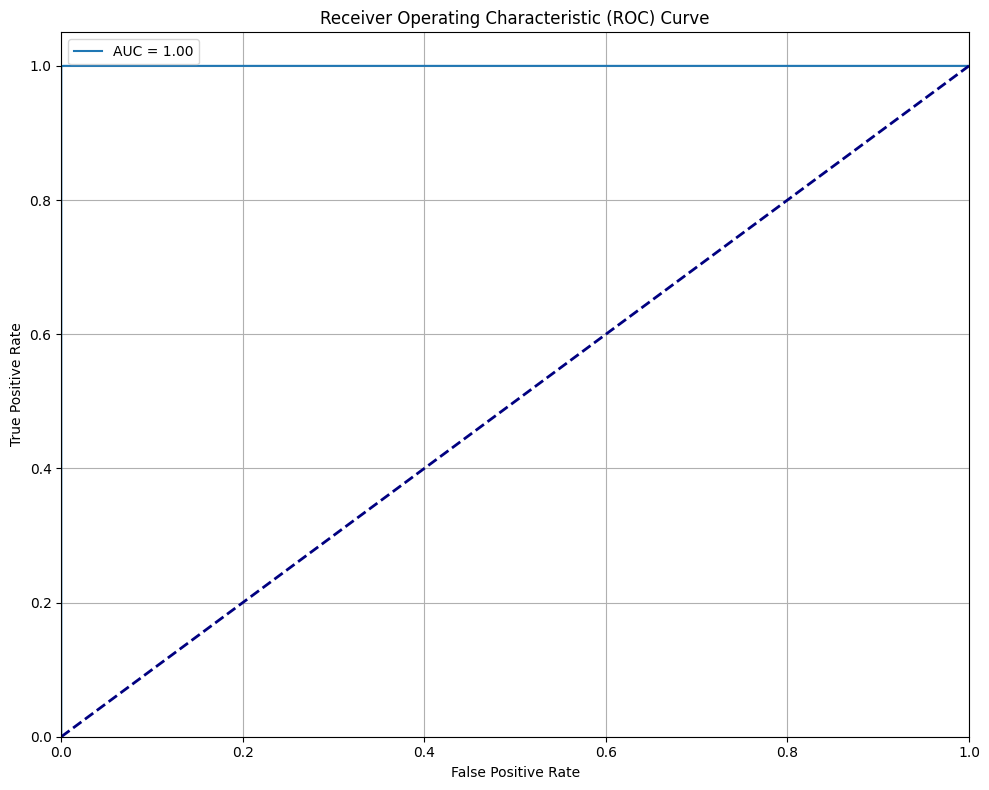

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predictions with probability scores from your trained model
predictions = trainer.predict(test_dataset)

# Extract probabilities for class 0 (positive class)
y_pred_proba = predictions.predictions[:, 0]  # Get scores for class 0 (positive)
y_true = predictions.label_ids  # True labels

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba, pos_label=0)  # Set pos_label=0 for positive class
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="upper left")  # Add legend to the plot
plt.grid(True)
plt.tight_layout()
plt.show()


Evaluate the Model

In [21]:
trainer.evaluate()

{'eval_loss': 0.0019903467036783695,
 'eval_accuracy': 0.9997772828507795,
 'eval_precision': 0.9997773773826764,
 'eval_recall': 0.9997772828507795,
 'eval_f1': 0.9997772804033698,
 'eval_runtime': 61.0812,
 'eval_samples_per_second': 147.017,
 'eval_steps_per_second': 9.201,
 'epoch': 3.0}

In [22]:
# predicts the accuracy of model on actual news
import torch

def test_model_on_article(model, tokenizer, news_article):
    """
    Tests the RoBERTa model on a real-world news article.
    """

    # Tokenize the input article
    inputs = tokenizer(news_article, return_tensors="pt", truncation=True, padding="max_length", max_length=512)

    # Move model and input to the correct device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    inputs = {key: val.to(device) for key, val in inputs.items()}

    # Make prediction
    model.eval()
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        predicted_class = torch.argmax(logits, dim=1).item()
        probs = torch.nn.functional.softmax(logits, dim=1)
        confidence = probs[0][predicted_class].item()

    # Label map (matches your FEVER dataset)
    label_map = {0: "TRUE", 1: "FAKE"}

    print(f"Predicted Class: {predicted_class} => {label_map[predicted_class]}")
    print(f"Confidence Score: {confidence:.4f}")


# Sample fake news article
news_article = """
Scientists Discover a Hidden City Beneath the Sahara Desert!

In an astonishing discovery, a team of archaeologists from an undisclosed research institute has reportedly uncovered the ruins of an ancient civilization beneath the Sahara Desert. Using ground-penetrating radar technology, researchers claim to have identified an extensive network of tunnels, structures, and artifacts dating back over 10,000 years—predating the Egyptian pyramids.

Lead scientist Dr. Marcus Langley stated, "This civilization appears to have been highly advanced, with evidence of an intricate water system and remnants of metal tools that do not match any known historical period."

Satellite images allegedly reveal massive underground chambers, leading to speculation that this lost city may be the true origin of many myths about lost civilizations. However, governments and scientific organizations remain skeptical, urging further investigation before drawing conclusions.

Critics argue that no verifiable evidence has been released, and some experts believe this may be an elaborate hoax or a misinterpretation of natural formations. Nevertheless, conspiracy theorists are already calling this the "Atlantis of the Sahara."

What else could be hidden beneath Earth's shifting sands?
"""

# # Sample real news article
# news_article = """
# Gaza’s fragile ceasefire shattered early Tuesday as Israel carried out deadly strikes across the enclave and Israeli Prime Minister Benjamin Netanyahu vowed to use “increasing military strength” against Hamas.

# The overnight bombardments struck multiple locations across Gaza and were the most extensive since a months-long ceasefire came into effect, with Israel’s Defense Minister Israel Katz declaring: “Tonight we returned to fighting in Gaza.”

# The ceasefire deal between Israel and Hamas was already hanging in the balance with phase one ending more than two weeks ago and all sides at loggerheads over a path forward that might see remaining Israeli hostages freed and a permanent peace secured.

# Israel’s military and security agency said they were “currently conducting extensive strikes” on Hamas targets in Gaza. In response, Hamas accused Netanyahu of deciding to overturn the ceasefire agreement, and “putting the captives in Gaza at risk of an unknown fate.”

# At least 210 people have been killed and hundreds wounded in the new wave of Israeli strikes, according to the Palestinian ministry of health in Gaza.

# The Civil Defense in Gaza said a number people were “trapped under the rubble of homes that were bombed in various areas” of the enclave. CNN stringers in Gaza reported the sounds of strikes in multiple locations, including Gaza City, Khan Younis and Deir al-Balah.

# Videos obtained by CNN showed scenes of panic and chaos across Gaza as families desperately rushed wounded loved ones to hospital and rescue workers transported patients in ambulances or on stretchers.

# Many of the wounded were covered with bloodstained blankets, while others had their limbs wrapped in bloodied bandages.

# The images showed several young children killed by the strikes.

# Deaths and injuries, including of children, have been reported at hospitals ranging from the northern end of the strip to its southern tip more than 30 kilometers (18 miles) away, including Al-Awda hospital in Tal Al-Zaatar, northern Gaza; Al-Awda hospital in Nuseirat, central Gaza; and Nasser hospital in the southern city of Khan Younis.

# Several hospitals said the casualties were due to civilian homes being hit by the strikes.
# """

# Run test
test_model_on_article(model, tokenizer, news_article)

Predicted Class: 1 => FAKE
Confidence Score: 0.9988


In [23]:
# saving the file 
import numpy as np

# Get logits from the predictions
logits = predictions.predictions

# Save to .npy file
np.save("roberta_logits.npy", logits)

In [24]:
model.save_pretrained("roberta_fakenews_model")
tokenizer.save_pretrained("roberta_fakenews_model")

('roberta_fakenews_model/tokenizer_config.json',
 'roberta_fakenews_model/special_tokens_map.json',
 'roberta_fakenews_model/vocab.json',
 'roberta_fakenews_model/merges.txt',
 'roberta_fakenews_model/added_tokens.json')